In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# need to install for every new env for read_excel
# pip install openpyxl

In [86]:
df = pd.read_excel("data.xlsx") 

In [ ]:
filename = 'parsed_data.xlsx'
df.to_excel(filename)

In [ ]:
df_shape = df.shape
print("The original dataset has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

In [ ]:
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]


In [ ]:
# encodes genres jaxx, electronic, folk/country, funk/soul/rnb, pop, rap/hip-hop, classical/baroque, rock
# this schema does not consider genres with multiple labels (e.g. "pop, rock") and only intakes the first genre label identified. 
lis = []
for d in df['true_genre']:
    if type(d) == str:
        d = d.lower()
        g = ''
        if 'jazz' in d:
            lis.append(1)
            continue
        if 'electronic' in d:
            lis.append(2)
            continue
        if ('folk' in d) or('country' in d):
            lis.append(3)
            continue
        if ('funk' in d) or ('soul' in d) or ('rnb' in d) or ('r&b' in d):
            lis.append(4)
            continue
        if 'pop' in d:
            lis.append(5)
            continue
        if ('rap' in d) or (('hip' in d) and ('hop' in d)):
            lis.append(6)
            continue
        if ('classical' in d) or ('baroque' in d):
            lis.append(7)
            continue
        if 'rock' in d:
            lis.append(8)
            continue
        if g == '':
            lis.append(None)
            continue
    else:
        lis.append(None)
        
print("lis length:", len(lis))
print("df length:", len(df))

In [ ]:
lis_gen = []
for d in df['genre']:
    if type(d) == str:
        d = d.lower()
        g = ''
        if 'jazz' in d:
            lis_gen.append(1)
            continue
        if 'electronic' in d:
            lis_gen.append(2)
            continue
        if ('folk' in d) or('country' in d):
            lis_gen.append(3)
            continue
        if ('funk' in d) or ('soul' in d) or ('rnb' in d) or ('r&b' in d):
            lis_gen.append(4)
            continue
        if 'pop' in d:
            lis_gen.append(5)
            continue
        if ('rap' in d) or (('hip' in d) and ('hop' in d)):
            lis_gen.append(6)
            continue
        if ('classical' in d) or ('baroque' in d):
            lis_gen.append(7)
            continue
        if 'rock' in d:
            lis_gen.append(8)
            continue
        if g == '':
            lis_gen.append(None)
            continue
    else:
        lis_gen.append(None)
        
print("lis length:", len(lis_gen))
print("df length:", len(df))

In [ ]:
df['genre_parse'] = lis
df['genre_predict'] = lis_gen

df.head(1)

In [ ]:
df_gen = df.copy(deep=True)
df_gen = df_gen.dropna(subset=['genre_predict'])

In [ ]:
# drops columns outside not included in the 8 above. 
df.dropna(subset=['genre_parse'], inplace=True)

In [ ]:
df_gen.dropna(subset=['genre_parse'], inplace=True)

In [ ]:
df_gen['genres_match'] = df_gen.apply(lambda row: row['genre_parse'] == row['genre_predict'], axis=1)

In [ ]:
print("AcousticBrainz Accuracy Estimation", sum(df_gen["genres_match"])/df_gen.shape[0])

In [ ]:
df_shape = df.shape
print("The dataset with 8 encoded genres has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

In [ ]:
# this shows all possible year labels 
df["year"].unique()

In [ ]:
def extract_year(value):
    try:
        return int(value)
    except ValueError:

        return None


df['year'] = df['year'].apply(extract_year)

In [ ]:
# inlcuding only valid years 
valid_years = [1998, 2013, 1984, 2003, 1997, 2005, 2014, 2007, 2006, 1996, 1979, 2004, 2001, 2002, 1992, 1968, 1995, 1993, 1989, 2008, 2009, 1961, 1965, 1988, 1999, 2000, 1977, 2010, 1982, 1991, 1985, 1964, 1970, 2011, 1960, 1994, 1980, 1983, 1957, 1958, 1963, 1987, 2012, 1939, 1966, 1990, 1986, 1969, 1956, 1955, 1972, 1962, 1981, 1971, 2015, 1967, 1978, 1975, 1976, 1974, 1953, 1973, 1959, 1951, 1952, 1949, 1944, 1954, 1937, 1938, 1950, 1940, 1933, 1946, 1934, 1201, 1948, 1945, 1935, 1941, 1010, 1924, 1947, 1930, 1927, 1942, 1929, 1936, 1932, 1928, 1943, 1931, 1803, 1202, 1919, 1925, 1923, 1913, 1910, 1920, 1876, 1890, 1905, 1899, 1856, 1916, 1926, 1917, 1922, 1918]

filtered_df = df[df['year'].isin(valid_years)] 
df_shape = filtered_df.shape
print("The dataset with valid years has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

In [ ]:
filtered_df = filtered_df.dropna(subset=['year'])

In [ ]:
print(filtered_df.dtypes["year"])

In [ ]:
filtered_df.loc[filtered_df["genre_parse"] == 1, "year"]

In [ ]:
filtered_df.loc[filtered_df["genre_parse"] == 1, "genre_parse"]

In [ ]:
filtered_df = filtered_df[filtered_df['year'] >= 1920]

In [ ]:
plt.figure(figsize=(15,10))

markers = [".", "o", "v", "^", "1", "s", "p", "*"]
c = ["blue", "green", "red", "brown", "yellow", "purple", "cyan", "black"]
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]

plt.figure(figsize=(15,10))
for i in range(8):

    yearly_counts = filtered_df[filtered_df['genre_parse'] == i+1].groupby('year').size()
    yearly_counts_df = yearly_counts.reset_index(name='count')
    plt.plot(yearly_counts_df['year'].values, yearly_counts_df['count'].values, marker=markers[i], color=c[i], label=genre[i])


plt.xlabel('Year')
plt.ylabel('Count of genres occurances')
plt.title('Occurrence of genres over the Years')
plt.grid(True)
plt.xticks(range(1920, 2025, 10))
plt.legend()

plt.show()
plt.savefig('Occurrence of genres over the Years')

In [ ]:
plt.figure(figsize=(15,10))
for i in range(8):

    counts = len(filtered_df[filtered_df['genre_parse'] == i+ 1])
    plt.bar(genre[i], height=counts, color=c[i])


plt.xlabel('genres')
plt.ylabel('Count of genres occurances')
plt.title('Occurrence of genres')



plt.show()
plt.savefig('Occurrence of genres over the Years')

In [ ]:
def find_non_numeric_columns(df):

    non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'int'])

    # non_numeric_columns now contains only the columns with data types other than int or float
    # list of names w non-numeric columns
    non_numeric_column_names = non_numeric_columns.columns.tolist()
    
    return non_numeric_column_names

In [ ]:
def encode_key_vectorized(df):
    # Create a mapping from unique values to their indices
    key_scale_mapping = {key: idx for idx, key in enumerate(df['key_scale'].unique())}
    key_key_mapping = {key: idx for idx, key in enumerate(df['key_key'].unique())}
    
    # Map the original column values to the indices
    df['key_scale'] = df['key_scale'].map(key_scale_mapping)
    df['key_key'] = df['key_key'].map(key_key_mapping)
    
    return df

In [ ]:
# enocdes the keys to numeric
encode_key_vectorized(filtered_df)
filtered_df.head(3)["key_scale"]

In [ ]:
find_non_numeric_columns(filtered_df)

In [ ]:
# makes bpm all ints
filtered_df["bpm"] = filtered_df["bpm"].apply(extract_year)

In [ ]:
filtered_df.dropna(subset=["bpm"], inplace=True)
print(filtered_df.shape)

In [ ]:
def is_string(x):
    return isinstance(x, str)


In [ ]:
# filtering out non_numeric columns
numeric_df = filtered_df.drop(columns=find_non_numeric_columns(filtered_df))

In [ ]:
numeric_df.columns

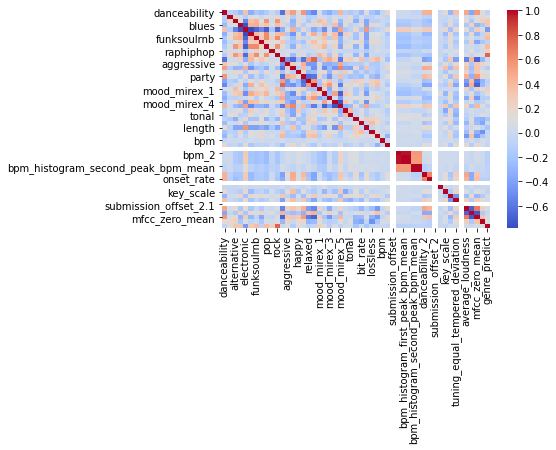

<Figure size 1080x1080 with 0 Axes>

In [39]:
# creating a correlation heatmap to find redundent features.
corr = numeric_df.corr()


sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.figure(figsize=(15,15))
plt.show()

In [40]:
# checking for any nans in the colums after filtering 

def count_nan_in_columns(df):
    return df.isna().sum()


In [41]:
nan_counts = count_nan_in_columns(numeric_df)
print(nan_counts)



danceability                               0
gender_male                                0
alternative                                0
blues                                      0
electronic                                 0
folkcountry                                0
funksoulrnb                                0
jazz                                       0
pop                                        0
raphiphop                                  0
rock                                       0
acoustic                                   0
aggressive                                 0
mood_electronic                            0
happy                                      0
party                                      0
relaxed                                    0
sad                                        0
mood_mirex_1                               0
mood_mirex_2                               0
mood_mirex_3                               0
mood_mirex_4                               0
mood_mirex

Text(0.5, 1.0, 'tuning frequency histogram')

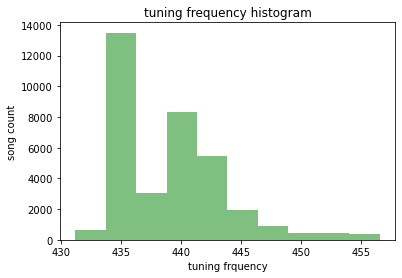

In [42]:
plt.hist(numeric_df["tuning_frequency"], alpha=.5, color="green")
plt.xlabel("tuning frquency")
plt.ylabel("song count")
plt.title("tuning frequency histogram")

Text(0.5, 1.0, 'bpm histogram')

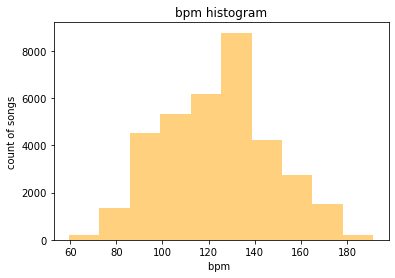

In [43]:
plt.hist(numeric_df["bpm_2"], alpha=.5, color="orange")
plt.xlabel("bpm ")
plt.ylabel("count of songs")
plt.title("bpm histogram")

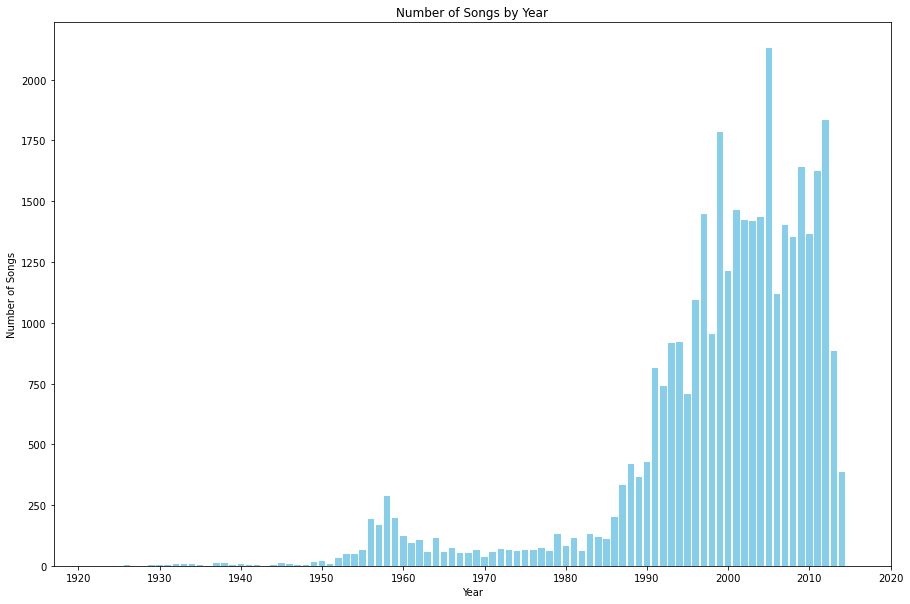

In [44]:
numeric_df['year'] = numeric_df['year'].astype(float)  # Convert to float first to handle strings like '2009.0'
numeric_df['year'] = numeric_df['year'].astype('Int64')
year_counts = numeric_df['year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.xticks(range(1920, 2025, 10))  # Rotate x-axis labels for better readability

plt.show()


In [45]:
from collections import defaultdict 

In [46]:
# blues_mapping = defaultdict()
# for idx, genre in enumerate(filtered_df['true_genre'].unique()):
#     if "blues" in str(genre):
#         blues_mapping[genre] = 1
#     else:
#         blues_mapping[genre] = 0
        

In [47]:
# filtered_df["blues_encoding"] = filtered_df["true_genre"].map(blues_mapping)
# print(filtere)
# filtered_df.head(3)

In [48]:
# cleaned_df = filtered_df.dropna(axis='columns')
# cleaned_df.shape

In [49]:
numeric_df.columns

Index(['danceability', 'gender_male', 'alternative', 'blues', 'electronic',
       'folkcountry', 'funksoulrnb', 'jazz', 'pop', 'raphiphop', 'rock',
       'acoustic', 'aggressive', 'mood_electronic', 'happy', 'party',
       'relaxed', 'sad', 'mood_mirex_1', 'mood_mirex_2', 'mood_mirex_3',
       'mood_mirex_4', 'mood_mirex_5', 'timbre_bright', 'tonal',
       'instrumental', 'bit_rate', 'length', 'lossless', 'replay_gain', 'bpm',
       'year', 'submission_offset', 'bpm_2',
       'bpm_histogram_first_peak_bpm_mean',
       'bpm_histogram_first_peak_bpm_median',
       'bpm_histogram_second_peak_bpm_mean',
       'bpm_histogram_second_peak_bpm_median', 'danceability_2', 'onset_rate',
       'submission_offset_2', 'key_key', 'key_scale', 'tuning_frequency',
       'tuning_equal_tempered_deviation', 'submission_offset_2.1',
       'average_loudness', 'dynamic_complexity', 'mfcc_zero_mean',
       'genre_parse', 'genre_predict'],
      dtype='object')

In [50]:
import numpy as np

In [53]:
PCA_df = numeric_df.drop(columns=["year", "genre_predict", "bpm","genre_parse", "alternative", "blues","electronic","folkcountry","funksoulrnb","jazz","pop","raphiphop", "rock", "acoustic", "aggressive", "mood_electronic"])

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(PCA_df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)


principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])




In [55]:
principalDf["genre_parse"] = numeric_df["genre_parse"]

In [56]:
sampled_df = principalDf.sample(n=20000, replace=False)

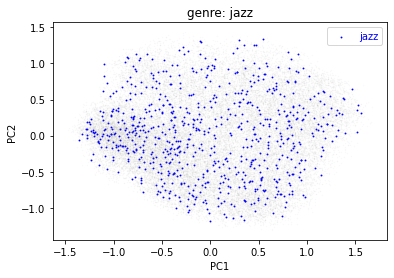

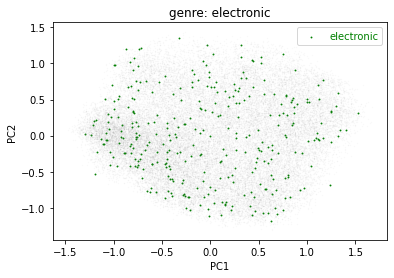

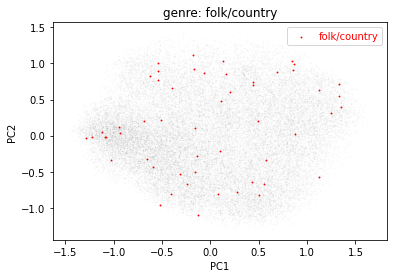

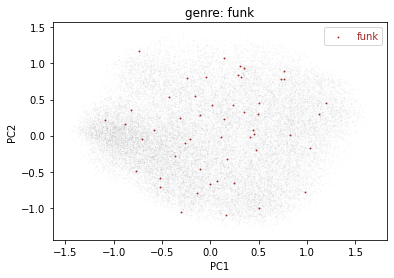

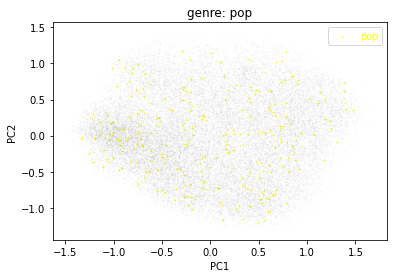

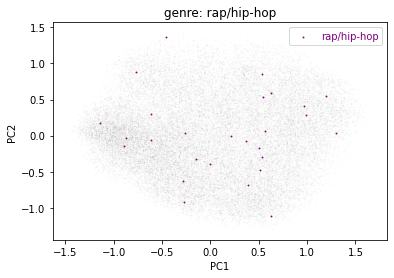

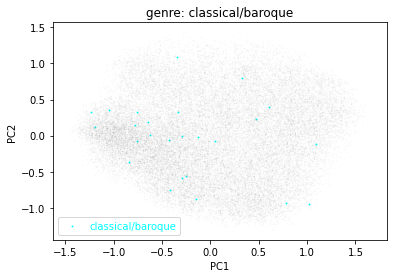

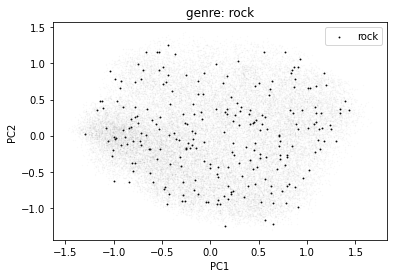

In [57]:
c = ["blue", "green", "red", "brown", "yellow", "purple", "cyan", "black"]
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]

for i in range(len(c)):
    
#     subset_0 = sampled_df[sampled_df['genre_parse'] == i+1]

#     plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=0.3, color=c[i], s = 0.1 )
    subset_0 = principalDf[principalDf['genre_parse'] == i+1]
    plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=1, color=c[i], s = 0.75, label = genre[i])
    plt.legend(labelcolor=c[i])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("genre: "+ genre[i])
    

    subset_rest = principalDf[principalDf['genre_parse'] != 1]
    plt.scatter(subset_rest['PC1'], subset_rest['PC2'], alpha=0.03, color="gray", s = 0.51 )

    plt.show()

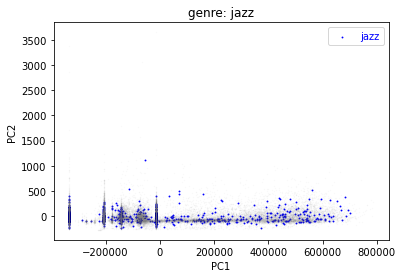

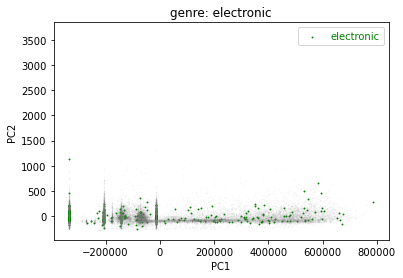

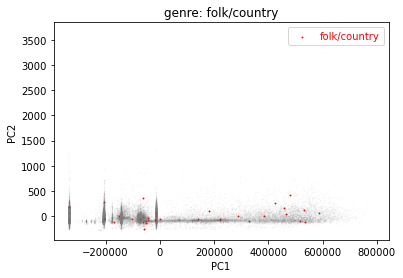

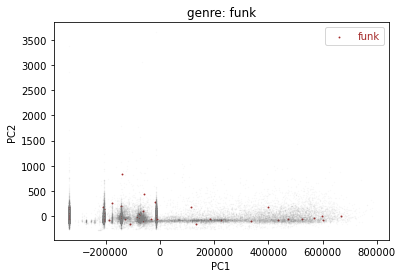

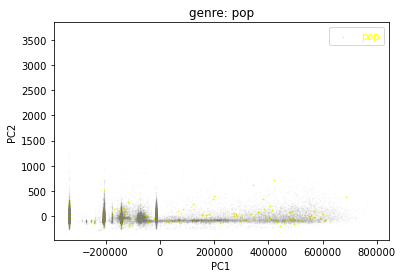

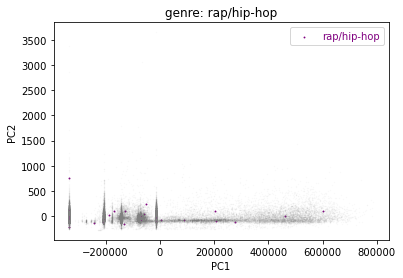

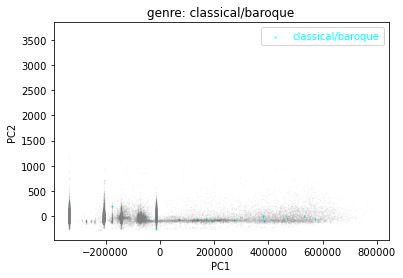

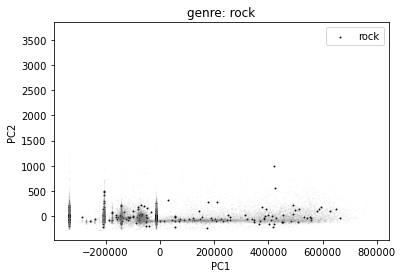

In [58]:
#unscaled

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCA_df)


principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDf["genre_parse"] = numeric_df["genre_parse"]

c = ["blue", "green", "red", "brown", "yellow", "purple", "cyan", "black"]
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]

for i in range(len(c)):
    
#     subset_0 = sampled_df[sampled_df['genre_parse'] == i+1]

#     plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=0.3, color=c[i], s = 0.1 )
    subset_0 = principalDf[principalDf['genre_parse'] == i+1]
    plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=1, color=c[i], s = 0.75, label = genre[i])
    plt.legend(labelcolor=c[i])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("genre: "+ genre[i])
    

    subset_rest = principalDf[principalDf['genre_parse'] != 1]
    plt.scatter(subset_rest['PC1'], subset_rest['PC2'], alpha=0.03, color="gray", s = 0.51 )

    plt.show()

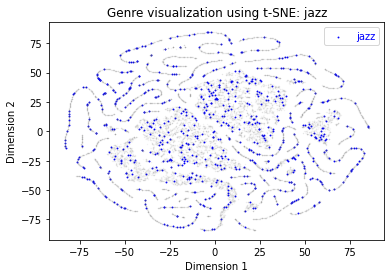

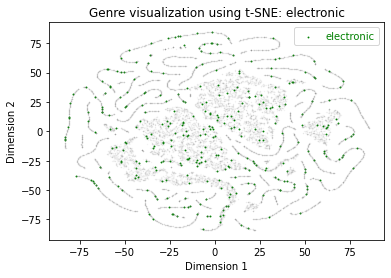

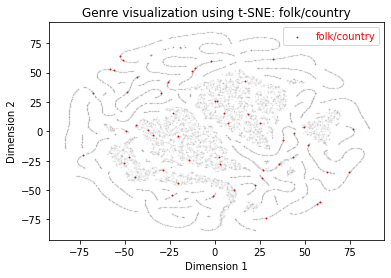

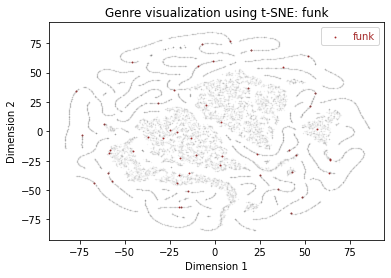

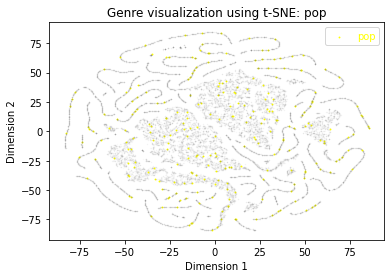

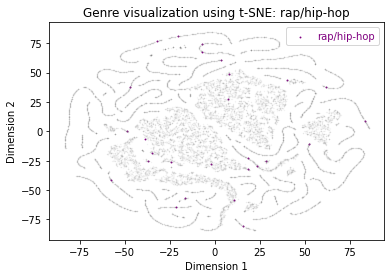

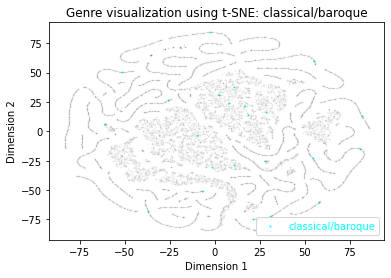

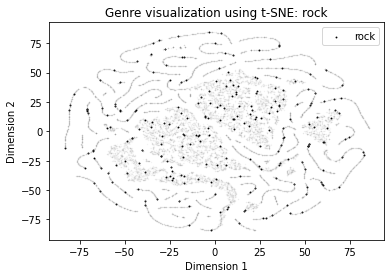

In [59]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


tsne = TSNE(n_components=2, random_state=0)


tsne_results = tsne.fit_transform(PCA_df)


tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dimension 1', 'Dimension 2'])

tsne_df["genre_parse"] = numeric_df["genre_parse"]


c = ["blue", "green", "red", "brown", "yellow", "purple", "cyan", "black"]
genre = ["jazz", "electronic", "folk/country", "funk", "pop", "rap/hip-hop", "classical/baroque", "rock"]

for i in range(len(c)):
    # Select the subset of points that belong to the current genre
    subset = tsne_df[tsne_df['genre_parse'] == i+1]
    
   
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], alpha=1, color=c[i], s=0.75, label=genre[i])
    
  
    subset_rest = tsne_df[tsne_df['genre_parse'] != i+1]
    plt.scatter(subset_rest['Dimension 1'], subset_rest['Dimension 2'], alpha=0.03, color="gray", s=0.51)

    
    plt.legend(labelcolor=c[i])
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Genre visualization using t-SNE: " + genre[i])
    
  
    plt.show()


In [ ]:
## junk code 

In [ ]:
principalDf["blues_encoding"] = cleaned_df["blues_encoding"]
principalDf.head(3)

In [ ]:
principalDf.iloc[0]["PC1"]

In [ ]:
for idx in range(len(principalDf)):
    print(idx)
    if idx==1:
        break

In [ ]:
subset_0 = principalDf[principalDf['blues_encoding'] == 0]
plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=0.01, color='blue', s = 0.1 )

# Filter and plot points where blues_encoding is 1
subset_1 = principalDf[principalDf['blues_encoding'] == 1]
plt.scatter(subset_1['PC1'], subset_1['PC2'], alpha=1, color='black', s = 0.1)

plt.show()

In [ ]:
# unscaled PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(PCA_df)


principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDf["blues_encoding"] = cleaned_df["blues_encoding"]

subset_0 = principalDf[principalDf['blues_encoding'] == 0]
plt.scatter(subset_0['PC1'], subset_0['PC2'], alpha=0.01, color='blue', s = 0.25 )

# Filter and plot points where blues_encoding is 1
subset_1 = principalDf[principalDf['blues_encoding'] == 1]
plt.scatter(subset_1['PC1'], subset_1['PC2'], alpha=1, color='black', s = 0.25)


plt.show()

In [ ]:
for idx in range(len(principalDf)):
    
    if principalDf.iloc[idx]["blues_encoding"] == 0:
        plt.scatter(principalDf.iloc[idx]["PC1"], principalDf.iloc[idx]["PC2"], alpha=.1, color = "blue")
    if principalDf.iloc[idx]["blues_encoding"] == 1:
        plt.scatter(principalDf.iloc[idx]["PC1"], principalDf.iloc[idx]["PC2"], alpha= 1, color = "black")
        
    if idx == 10000:
        break
        
  

plt.show()

In [ ]:
 principalDf["song_title"]= df["song"]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
kmeans = KMeans(n_clusters=5)
principalDf['cluster'] = kmeans.fit_predict(principalDf[['PC1', 'PC2', 'PC3']])


In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['font.family'] = 'DejaVu Sans'
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple'}

ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c=principalDf['cluster'].map(colors), marker='o')

# Label each point with its song title
for i, txt in enumerate(principalDf['song_title']):
    ax.text(principalDf['PC1'][i], principalDf['PC2'][i], principalDf['PC3'][i], txt, size=5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
plt.scatter(principalDf["principal component 1"], principalDf["principal component 2"], alpha=.01)


In [ ]:
decade_encoding = {
    '1950': 6, '1951': 6, '1952': 6, '1953': 6, '1954': 6, '1955': 6, '1956': 6, '1957': 6, '1958': 6, '1959': 6,
    '1960': 7, '1961': 7, '1962': 7, '1963': 7, '1964': 7, '1965': 7, '1966': 7, '1967': 7, '1968': 7, '1969': 7,
    '1970': 8, '1971': 8, '1972': 8, '1973': 8, '1974': 8, '1975': 8, '1976': 8, '1977': 8, '1978': 8, '1979': 8,
    '1980': 9, '1981': 9, '1982': 9, '1983': 9, '1984': 9, '1985': 9, '1986': 9, '1987': 9, '1988': 9, '1989': 9,
    '1990': 10, '1991': 10, '1992': 10, '1993': 10, '1994': 10, '1995': 10, '1996': 10, '1997': 10, '1998': 10, '1999': 10,
    '2000': 11, '2001': 11, '2002': 11, '2003': 11, '2004': 11, '2005': 11, '2006': 11, '2007': 11, '2008': 11, '2009': 11,
    '2010': 12, '2011': 12, '2012': 12, '2013': 12, '2014': 12, '2015': 12, '2016': 12, '2017': 12, '2018': 12, '2019': 12
}



In [ ]:
cleaned_df['decade_code'] = cleaned_df['year'].astype(str).map(decade_encoding)


In [ ]:
filtered_df['year'] = filtered_df['year'].astype(str)
year_counts = filtered_df['year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(24, 12))  # Adjust the figure size if needed
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
unique_years = df['year'].unique()

# Print or use unique_years as needed
print(unique_years)

In [ ]:
unique_genres = df['true_genre'].unique()

# Print or use unique_years as needed
len(unique_genres)